In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics.cluster import rand_score
import math

# Reading and preparing data

In [2]:
df = pd.read_csv('wine-data.csv')

In [3]:
df.columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

In [4]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Finding values which aren't valid
mask = df.T.apply(lambda x: any(pd.isnull(pd.to_numeric(x, errors='coerce'))))

In [6]:
df[mask]

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899.999,0.57,1.63,470


In [7]:
df.drop(df[mask].index, inplace=True)
df.reset_index(inplace=True)

In [8]:
df_x = df[df.columns[1:]]
df_y = df['Class']

In [9]:
# Scaling data
min_max_scaler = MinMaxScaler()
df_x = pd.DataFrame(min_max_scaler.fit_transform(df_x), columns=df_x.columns, index=df_x.index)

In [10]:
df_x.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


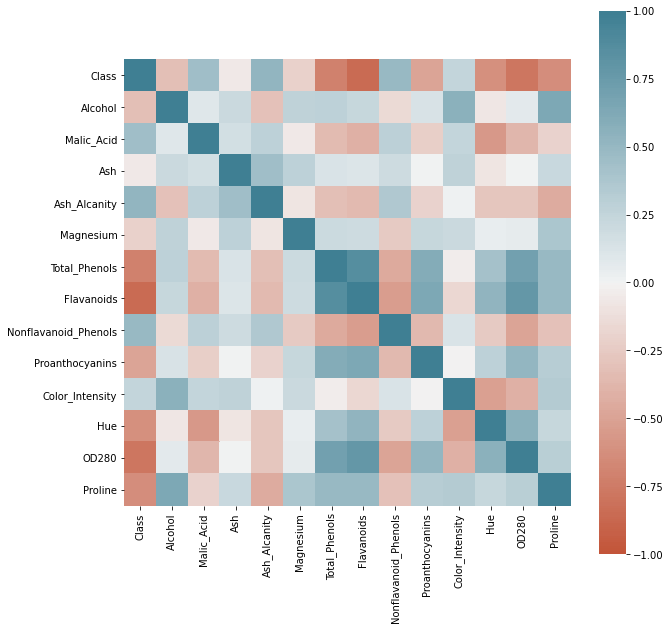

In [11]:
# Finding any parameter correlations
fig, ax = plt.subplots(figsize=(10,10))
corr = df_x.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)

# Kmeans

In [12]:
# finding optimal number of clusters, even though we know there are 3 classes
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_x)
    distortions.append(kmeanModel.inertia_)

C:\Users\Milance\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


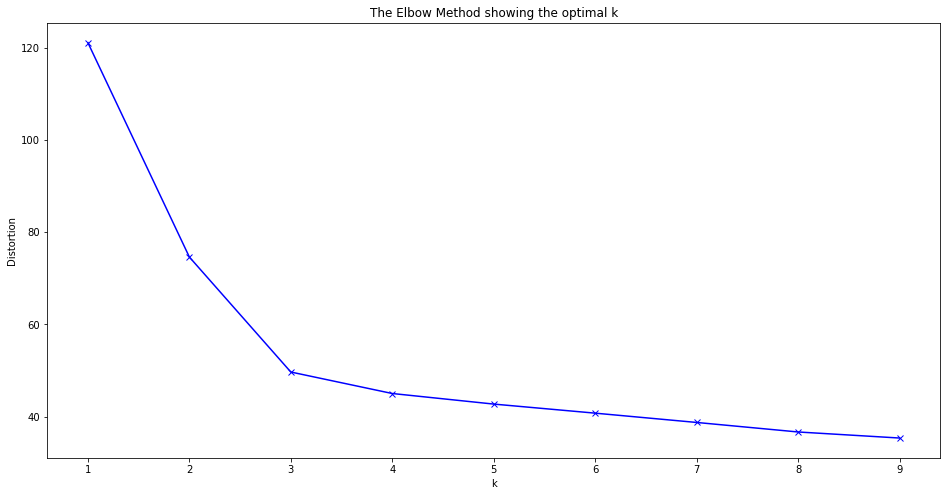

In [13]:
# Ploting Elbow Method
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_x)

KMeans(n_clusters=3)

In [15]:
# Reduecing data to 3 dimensions, so visualization can be possible
pca = PCA(n_components=3)
coors = pca.fit_transform(df_x)

x = [x for x, y, z in coors]
y = [y for x, y, z in coors]
z = [z for x, y, z in coors]

centroid_x, centroid_y, centroid_z = pca.transform(kmeanModel.cluster_centers_).T

In [16]:
# Method used to replace cluster labels, since cluster number is not allways the same
def replace_cluster_labels(y, labels):
    wine_dict = dict()
    for wine_class in y.unique():
        maximum = 0
        max_i = -1
        for label in set(labels):
            no = sum((y.values==wine_class) & (labels == label))
            if no>maximum:
                max_i = label
                maximum = no
        wine_dict[max_i] = wine_class
    new_labels = [wine_dict[label] for label in labels]
    return new_labels

In [17]:
# Method for finding relevant scores
def print_scores(y_test, y_predicted):
    print(f'Accuracy score: {accuracy_score(y_test, y_predicted)}')
    print(f'Rand score: {rand_score(y_test, y_predicted)}')
    print(f'Adjusted rand score: {metrics.adjusted_rand_score(y_test, y_predicted)}')
    print(f'Rand score: {metrics.rand_score(y_test, y_predicted)}')
    print(f'Homogenity score: {metrics.homogeneity_score(y_test, y_predicted)}')
    print(f'Completeness score: {metrics.completeness_score(y_test, y_predicted)}')
    print(f'Adjusted mutual info score: {metrics.adjusted_mutual_info_score(y_test, y_predicted)}')
    print(f'Contigency matrix score: \n{metrics.cluster.contingency_matrix(y_test, y_predicted)}')
    print(f'Pair confusion score: \n{metrics.cluster.pair_confusion_matrix(y_test, y_predicted)}')
    print(f'Fowlkes Mallows score: {metrics.fowlkes_mallows_score(y_test, y_predicted)}')
    print(f'Homogeneity completeness v measure score: {metrics.homogeneity_completeness_v_measure(y_test, y_predicted)}')
    print(f'Homogeneity score: {metrics.homogeneity_score(y_test, y_predicted)}')
    print(f'Mutual info score: {metrics.mutual_info_score(y_test, y_predicted)}')
    print(f'Normalized mutual infor score: {metrics.normalized_mutual_info_score(y_test, y_predicted)}')
    print(f'V measure score: {metrics.v_measure_score(y_test, y_predicted)}')

<IPython.core.display.Javascript object>


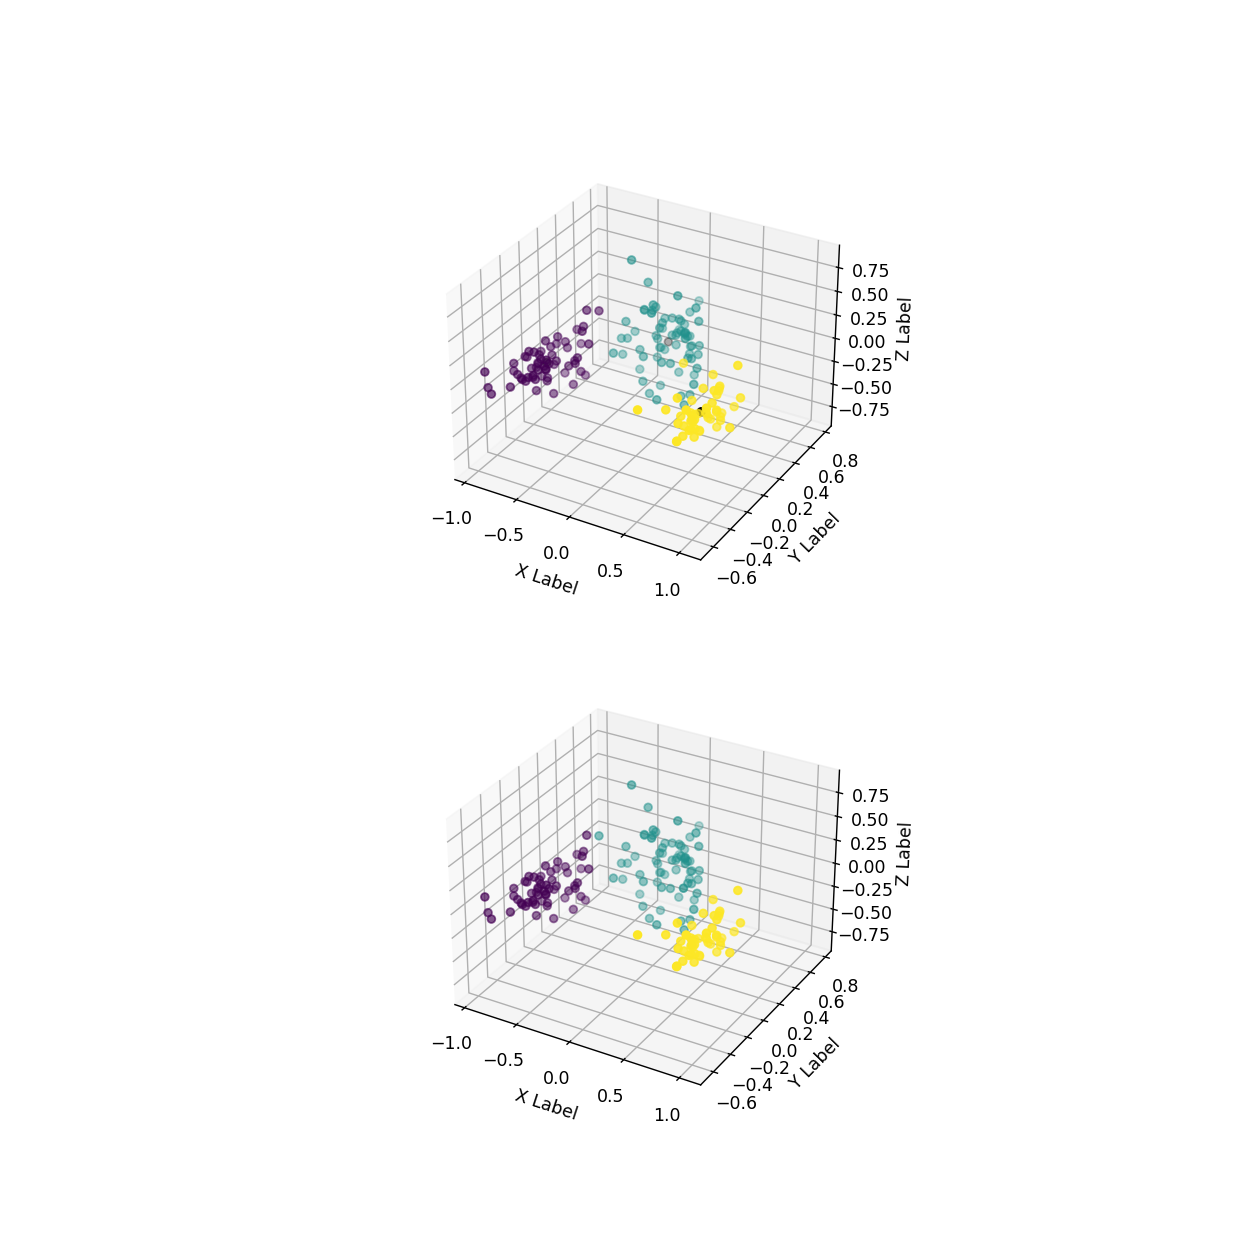

In [18]:
%matplotlib notebook
new_labels = replace_cluster_labels(df_y, kmeanModel.labels_)
# adding figure for Kmeans cluster
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter3D(x, y, z, c=new_labels)
ax.scatter3D(centroid_x, centroid_y, centroid_z, c='black')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# adding figure with original data
ax = fig.add_subplot(212, projection='3d')
ax.scatter3D(x, y, z, c=df_y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

<IPython.core.display.Javascript object>


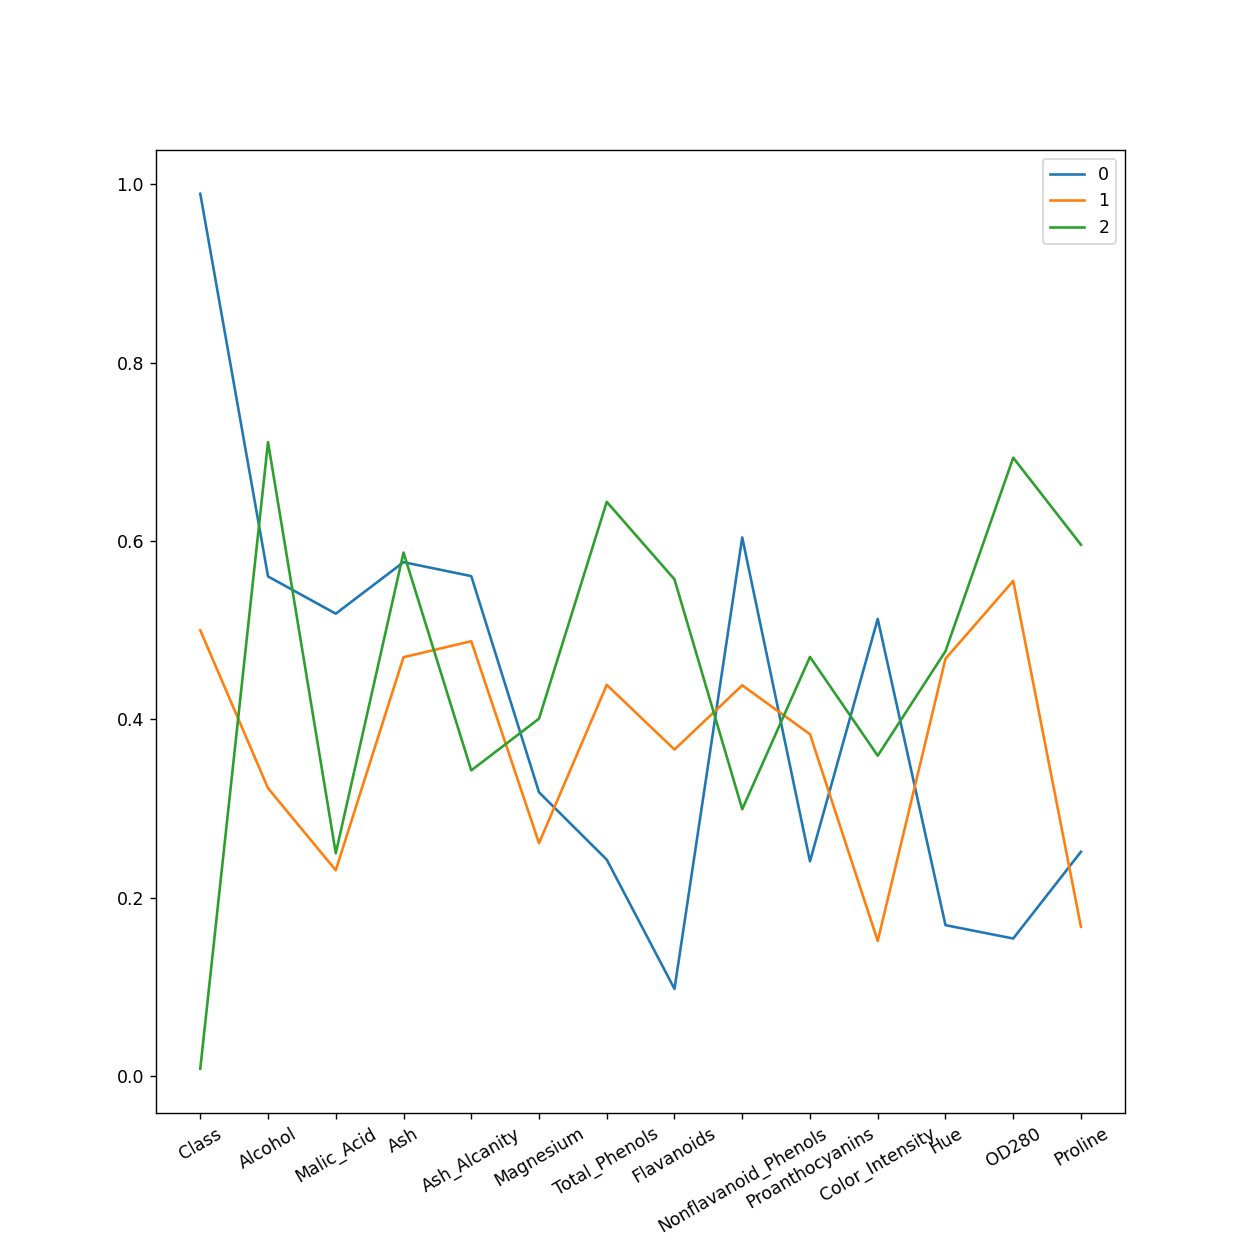

In [19]:
# Ploting centroids
ax = pd.DataFrame(kmeanModel.cluster_centers_, columns=df_x.columns).T.plot(figsize=(10,10))
plt.xticks(list(range(df_x.shape[1])), list(df_x.columns), rotation=30)
plt.show()

In [20]:
print_scores(df_y, new_labels)

Accuracy score: 0.9887005649717514
Rand score: 0.9842706728299949
Adjusted rand score: 0.9648380833598698
Rand score: 0.9842706728299949
Homogenity score: 0.94819347547255
Completeness score: 0.9454837954695876
Adjusted mutual info score: 0.9462685530558027
Contigency matrix score: 
[[59  0  0]
 [ 1 69  1]
 [ 0  0 47]]
Pair confusion score: 
[[20386   212]
 [  278 10276]]
Fowlkes Mallows score: 0.9767180447518378
Homogeneity completeness v measure score: (0.94819347547255, 0.9454837954695876, 0.9468366968182078)
Homogeneity score: 0.94819347547255
Mutual info score: 1.0285305601058166
Normalized mutual infor score: 0.9468366968182077
V measure score: 0.9468366968182078


## Outlier detection

In [21]:
# Finding instances which are distant more than 3 sigma from their centroid 
distances = pd.DataFrame(zip([sum(abs(row)) for row in kmeanModel.transform(df_x)], kmeanModel.labels_, new_labels), columns=['Distance', 'Cluster', 'Original class'])
distance_std = {label: distances.loc[distances.Cluster==label, 'Distance'].std() for label in distances.Cluster.unique()}
distance_mean = {label: distances.loc[distances.Cluster==label, 'Distance'].mean() for label in distances.Cluster.unique()}
distances['distance_std'] = distances.apply(lambda x: abs(x.Distance - distance_mean[x.Cluster]) / distance_std[x.Cluster], axis=1)

mask = distances[distances.distance_std > 2.5].index
distances.loc[mask]

,Distance,Cluster,Original class,distance_std
14,3.831720,2,1,2.819808
121,4.047185,1,2,3.494907
158,3.926172,0,3,2.929730


In [22]:
# Printing found instances and analysing why are isntances further
out_df = pd.DataFrame(kmeanModel.cluster_centers_, columns=df_x.columns , index=[f'center {i}' for i in range(3)]).T
out_df[distances.loc[mask].index] = df_x.loc[distances.loc[mask].index].T

out_df

,center 0,center 1,center 2,14,121,158
Class,0.989583,0.500000,0.008333,0.000000,0.500000,1.000000
Alcohol,0.560417,0.322960,0.711096,0.881579,0.139474,0.871053
Malic_Acid,0.518651,0.230939,0.250000,0.223320,0.258893,0.185771
Ash,0.576426,0.469813,0.587166,0.545455,1.000000,0.716578
Ash_Alcanity,0.560782,0.487823,0.342955,0.072165,0.922680,0.742268
Magnesium,0.318388,0.261342,0.400906,0.347826,0.532609,0.304348
Total_Phenols,0.242816,0.438831,0.644080,0.800000,0.758621,0.627586
Flavanoids,0.097882,0.366294,0.557138,0.696203,1.000000,0.204641
Nonflavanoid_Phenols,0.604167,0.438337,0.299371,0.301887,0.641509,0.754717
Proanthocyanins,0.240996,0.383486,0.470137,0.804416,0.460568,0.722397


<IPython.core.display.Javascript object>


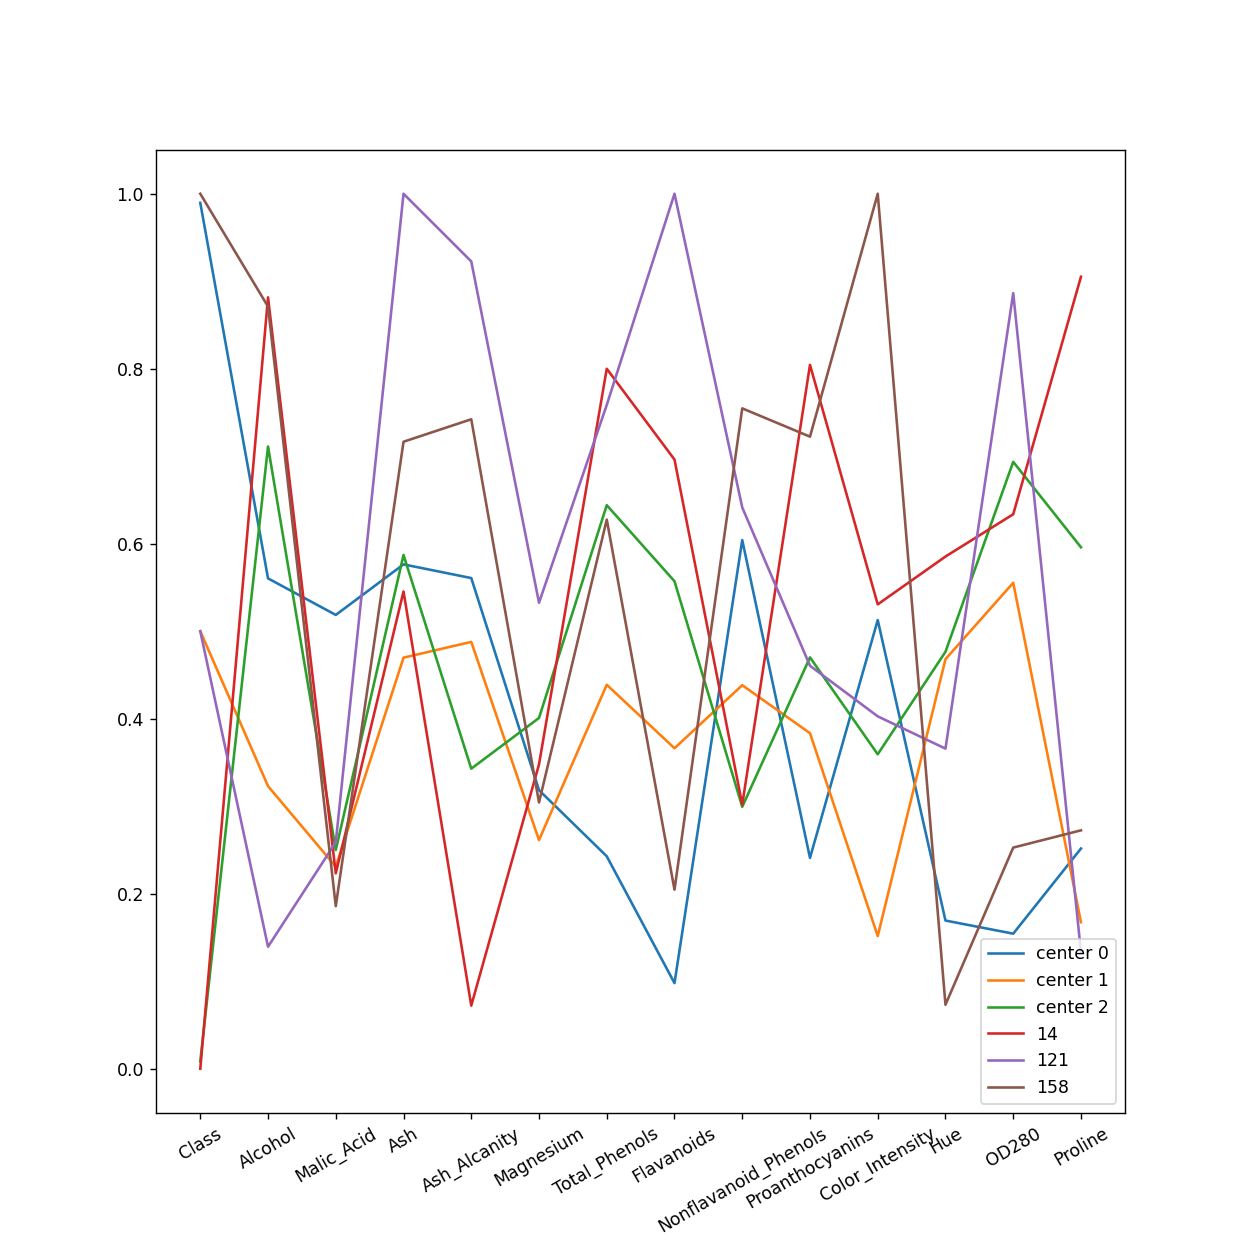

In [23]:
ax = out_df.plot(figsize=(10,10))
plt.xticks(list(range(df_x.shape[1])), list(df_x.columns), rotation=30)
plt.show()

In [24]:
# Comparing original class with predicted class
diff_df = pd.DataFrame(kmeanModel.cluster_centers_, columns=df_x.columns , index=[f'center {i}' for i in range(3)]).T
diff_mask = [i for i,j,k in zip(df_y.index, df_y, new_labels) if j!=k]
difference_df = pd.DataFrame([(i,j,k) for i,j,k in zip(df_y.index, df_y, new_labels) if j!=k], columns= ['Index', 'Original', 'Predicted'])
difference_df[['Original', 'Predicted']] = difference_df[['Original', 'Predicted']].replace(dict(zip(new_labels, kmeanModel.labels_)))
difference_df

,Index,Original,Predicted
0,73,1,2
1,83,1,0


In [25]:
# printing instances which aren't properly classified
diff_df[diff_mask] = df_x.loc[diff_mask].T
diff_df

,center 0,center 1,center 2,73,83
Class,0.989583,0.500000,0.008333,0.500000,0.500000
Alcohol,0.560417,0.322960,0.711096,0.515789,0.531579
Malic_Acid,0.518651,0.230939,0.250000,0.183794,0.616601
Ash,0.576426,0.469813,0.587166,0.663102,0.513369
Ash_Alcanity,0.560782,0.487823,0.342955,1.000000,0.613402
Magnesium,0.318388,0.261342,0.400906,0.750000,0.163043
Total_Phenols,0.242816,0.438831,0.644080,0.800000,0.231034
Flavanoids,0.097882,0.366294,0.557138,0.537975,0.263713
Nonflavanoid_Phenols,0.604167,0.438337,0.299371,0.150943,0.905660
Proanthocyanins,0.240996,0.383486,0.470137,0.488959,0.381703


<IPython.core.display.Javascript object>


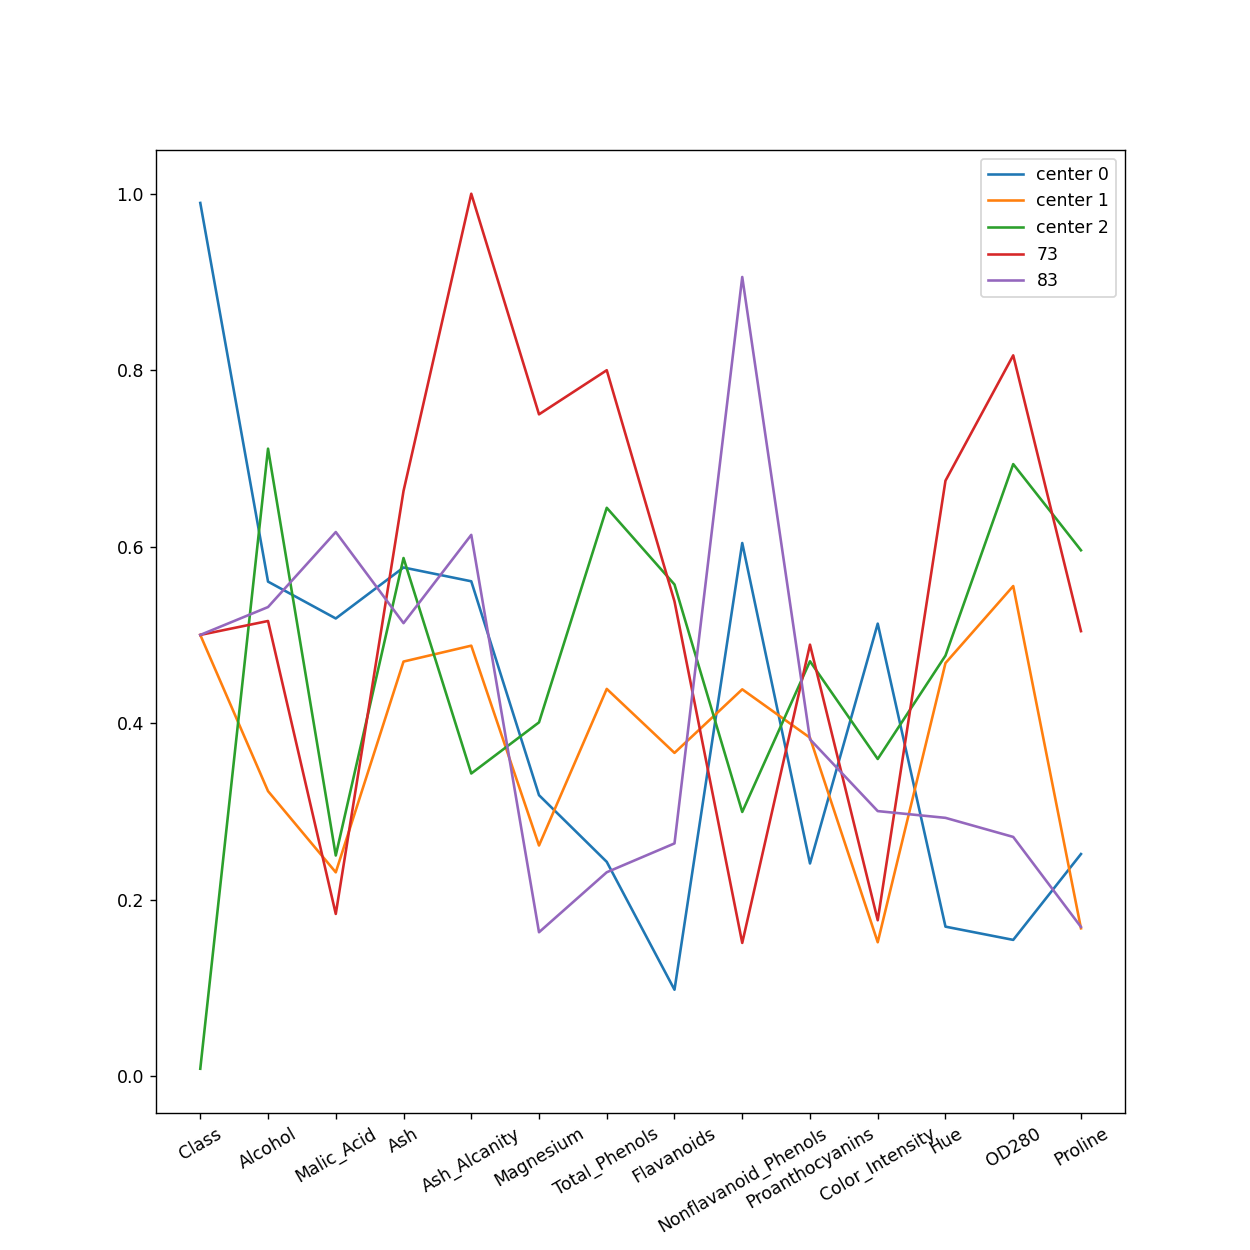

In [26]:
ax = diff_df.plot(figsize=(10,10))
plt.xticks(list(range(df_x.shape[1])), list(df_x.columns), rotation=30)
plt.show()

## Model without outliers

In [27]:
df_temp_x = df_x.drop(df_x.iloc[mask].index, axis=0)
df_temp_y = df_y.drop(df_y.iloc[mask].index, axis=0)

In [28]:
kmeanModel_t = KMeans(n_clusters=3)
kmeanModel_t.fit(df_temp_x)

KMeans(n_clusters=3)

In [29]:
# Reduecing data to 3 dimensions, so visualization can be possible
pca_t = PCA(n_components=3)
coors = pca_t.fit_transform(df_temp_x)

x_t = [x for x, y, z in coors]
y_t = [y for x, y, z in coors]
z_t = [z for x, y, z in coors]

centroid_t_x, centroid_t_y, centroid_t_z = pca.transform(kmeanModel_t.cluster_centers_).T

<IPython.core.display.Javascript object>


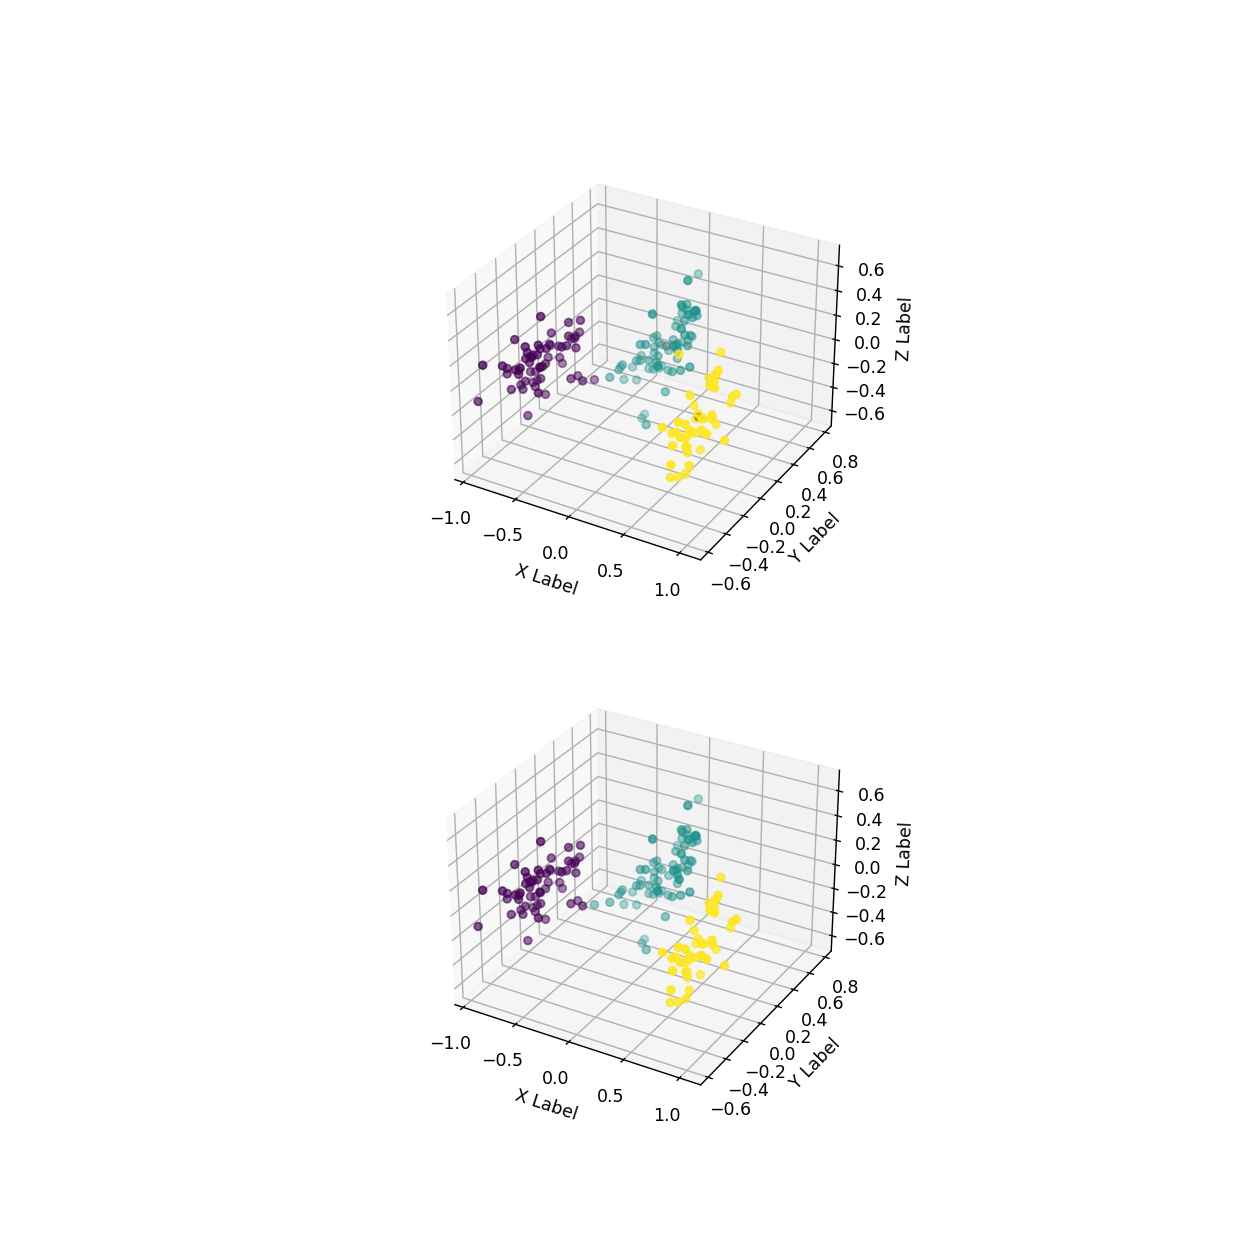

In [30]:
%matplotlib notebook
new_labels_t = replace_cluster_labels(df_temp_y, kmeanModel_t.labels_)
# adding figure for Kmeans cluster
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter3D(x_t, y_t, z_t, c=new_labels_t)
ax.scatter3D(centroid_t_x, centroid_t_y, centroid_t_z, c='black')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# adding figure with original data
ax = fig.add_subplot(212, projection='3d')
ax.scatter3D(x_t, y_t, z_t, c=df_temp_y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [31]:
print_scores(df_temp_y, new_labels_t)

Accuracy score: 0.9885057471264368
Rand score: 0.9839877748986778
Adjusted rand score: 0.9642171020776358
Rand score: 0.9839877748986778
Homogenity score: 0.9474792459290378
Completeness score: 0.9446766516475116
Adjusted mutual info score: 0.9454891242971738
Contigency matrix score: 
[[58  0  0]
 [ 1 68  1]
 [ 0  0 46]]
Pair confusion score: 
[[19688   208]
 [  274  9932]]
Fowlkes Mallows score: 0.9763149765510344
Homogeneity completeness v measure score: (0.9474792459290378, 0.9446766516475116, 0.946075873236594)
Homogeneity score: 0.9474792459290378
Mutual info score: 1.0272948772934638
Normalized mutual infor score: 0.946075873236594
V measure score: 0.946075873236594


# Agglomerative Clustering

In [32]:
aggloModel = AgglomerativeClustering(n_clusters=3)
aggloModel.fit(df_x)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>


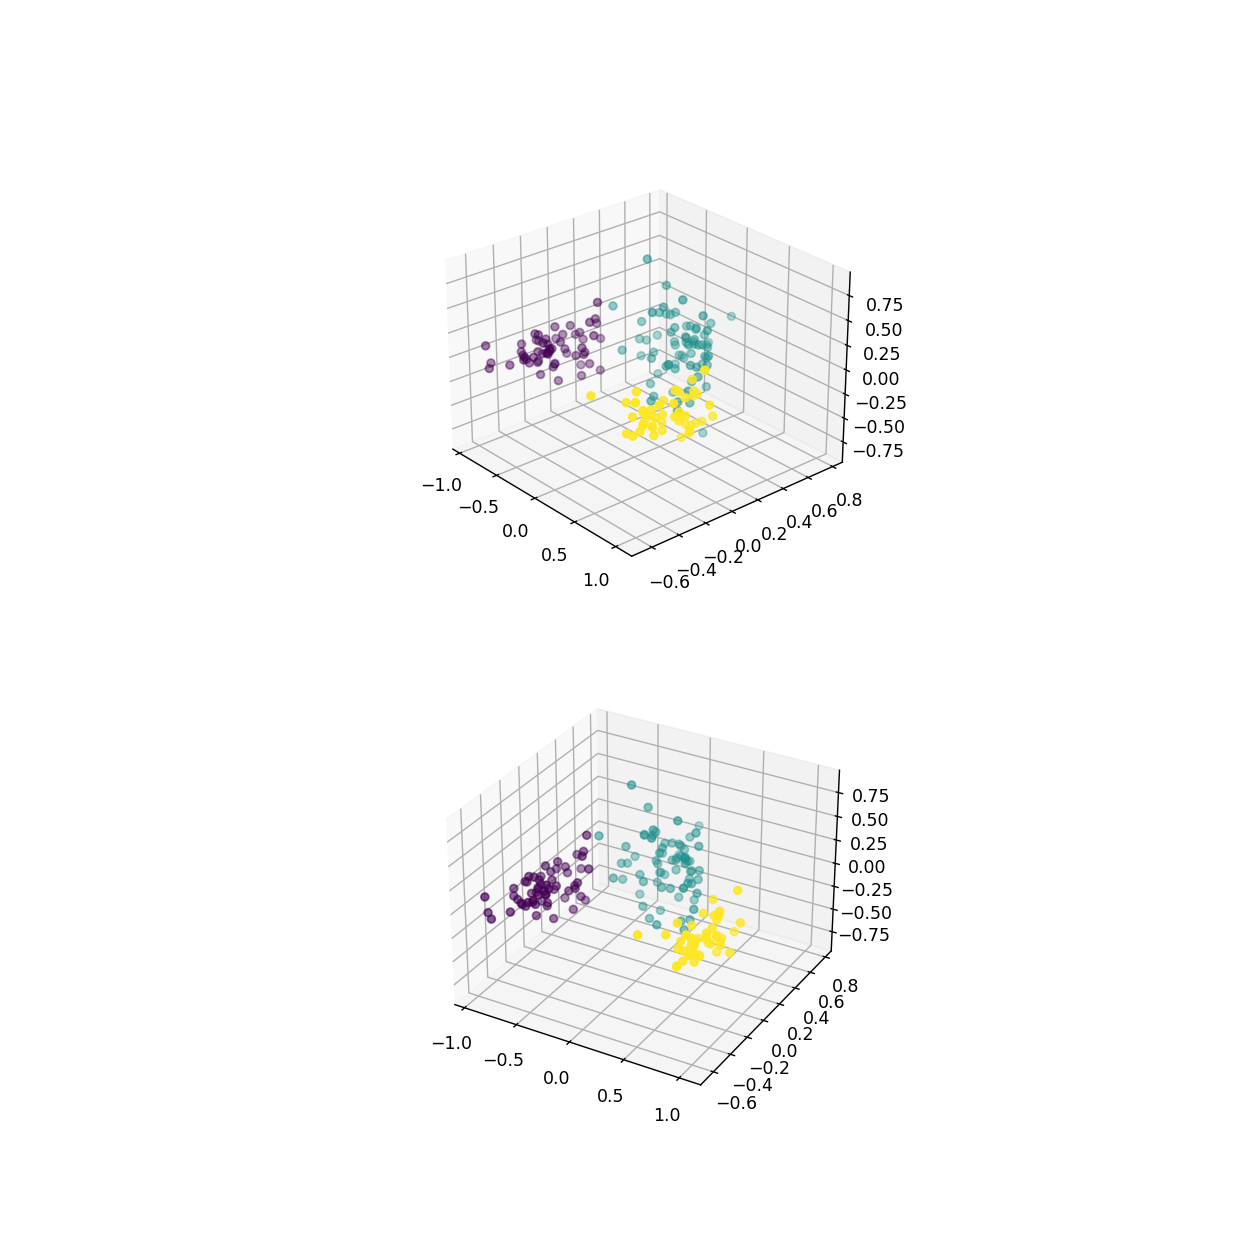

In [33]:
%matplotlib notebook
new_labels = replace_cluster_labels(df_y, aggloModel.labels_)
# Ploting data from Agglomerative clustering
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter3D(x, y, z, c=new_labels)

# Ploting original data
ax = fig.add_subplot(212, projection='3d')
ax.scatter3D(x, y, z, c=df_y)
plt.show()

In [34]:
print_scores(df_y, new_labels)

Accuracy score: 1.0
Rand score: 1.0
Adjusted rand score: 1.0
Rand score: 1.0
Homogenity score: 1.0
Completeness score: 1.0
Adjusted mutual info score: 1.0
Contigency matrix score: 
[[59  0  0]
 [ 0 71  0]
 [ 0  0 47]]
Pair confusion score: 
[[20598     0]
 [    0 10554]]
Fowlkes Mallows score: 1.0
Homogeneity completeness v measure score: (1.0, 1.0, 1.0)
Homogeneity score: 1.0
Mutual info score: 1.084726468501831
Normalized mutual infor score: 1.0
V measure score: 1.0


## Outlier detection

In [35]:
# Finding predicted labels which are not the same as original
diff_df = pd.DataFrame(index=df_x.columns)
diff_mask = [i for i,j,k in zip(df_y.index, df_y, new_labels) if j!=k]
difference_df = pd.DataFrame([(i,j,k) for i,j,k in zip(df_y.index, df_y, new_labels) if j!=k], columns= ['Index', 'Original', 'Predicted'])
difference_df[['Original', 'Predicted']] = difference_df[['Original', 'Predicted']].replace(dict(zip(new_labels, aggloModel.labels_)))
difference_df

,Index,Original,Predicted


In [36]:
# Printing instances which are found
diff_df[diff_mask] = df_x.loc[diff_mask].T
diff_df

""
Class
Alcohol
Malic_Acid
Ash
Ash_Alcanity
Magnesium
Total_Phenols
Flavanoids
Nonflavanoid_Phenols
Proanthocyanins


In [37]:
if not diff_df.empty:
    ax = diff_df.plot(figsize=(10,10))
    plt.xticks(list(range(df_x.shape[1])), list(df_x.columns), rotation=30)
    plt.show()